### Data

In [1]:
plt.style.use('bmh')
color = '#1240AB'

In [2]:
df_nft = pd.read_pickle('data/df_nft1.pkl')
print(df_nft.shape)
df_nft[:3]

(8915, 24)


,collection_name,token_id,image_url,minted_timestamp,last_refreshed,trnx_cnt,trnx_sum,Fur,Hat,Eyes,Mouth,Clothes,Background,Earring,nft_cnt,Fur_r,Hat_r,Eyes_r,Mouth_r,Clothes_r,Background_r,Earring_r,rarity,rarity_segment
0,BoredApeYachtClub,5,"<img style=""max-height:80px;"" src=""https://ipf...",2021-04-22,2023-01-28,1,194.20,Brown,Bayc Flipped Brim,X Eyes,Dumbfounded,Bayc T Red,Army Green,NaN,1,7.19,45.72,42.25,19.42,74.29,8.03,NaN,196.90,3_TOP3
1,BoredApeYachtClub,6,"<img style=""max-height:80px;"" src=""https://ipf...",2021-04-22,2023-01-28,3,162.00,Cream,S&m Hat,Crazy,Bored,Tweed Suit,Yellow,NaN,1,15.61,41.47,23.84,4.32,71.32,7.84,NaN,164.39,2_TOP2
2,BoredApeYachtClub,8,"<img style=""max-height:80px;"" src=""https://ipf...",2021-04-22,2023-01-28,1,110.00,Zombie,Beanie,Robot,Bored,NaN,Aquamarine,Gold Stud,1,33.39,17.48,29.23,4.32,NaN,7.95,22.57,114.93,1_TOP1


In [3]:
df_trnx = pd.read_pickle('data/df_trnx1.pkl')
df_trnx['eth_price_log'] = df_trnx.eth_price.map(np.log1p)
df_trnx['eth_price2'] = df_trnx.eth_price_log.map(np.expm1)
df_trnx[:3]

,timestamp,exchange_name,contract_version,usd_price,eth_price,royalty_fee,platform_fee,collection_name,token_id,transaction_hash,seller_address,buyer_address,is_multi_token_sale,multi_token_sale_index,day,month,quarter,year,year_month,trnx_len,price2max,price2mean,price2median,price_good,eth_price_log,eth_price2
0,2023-03-23 11:15:23+00:00,opensea,seaport,"21,696.37",12.37,0.06,0.00,MutantApeYachtClub,10972,"<a href=""https://etherscan.io/tx/0x5f438f5b5dd...",0x0097b9cfe64455eed479292671a1121f502bc954,0xdf04f866d8e581982b442b613f8b77655425e545,False,0,2023-03-23,2023-03-01,2023Q1,2023,202303,1,58.88,71.93,65.67,1,2.59,12.36
1,2023-03-23 11:03:35+00:00,blur,v1,"21,129.12",12.06,0.06,0.00,MutantApeYachtClub,12974,"<a href=""https://etherscan.io/tx/0x92af5b4a0c8...",0x5e1416e0ec35b47a6b7687c5e783e9b98a83dd45,0x4c092f3597a5c81bcbc6746ed598c58a890d26ff,False,0,2023-03-23,2023-03-01,2023Q1,2023,202303,3,30.16,64.56,80.40,1,2.57,12.06
2,2023-03-23 11:03:35+00:00,blur,v1,"21,111.60",12.05,0.06,0.00,MutantApeYachtClub,15768,"<a href=""https://etherscan.io/tx/0x92af5b4a0c8...",0x5e1416e0ec35b47a6b7687c5e783e9b98a83dd45,0x7476a30f99109803dc289850412131dfba8e754d,False,0,2023-03-23,2023-03-01,2023Q1,2023,202303,3,75.31,93.75,95.63,1,2.57,12.05


In [4]:
feats_id = ['collection_name','token_id']

feats1 = ['Fur', 'Hat', 'Eyes', 'Mouth','Clothes', 'Background', 'Earring']
feats2 = ['Fur_r', 'Hat_r', 'Eyes_r', 'Mouth_r','Clothes_r', 'Background_r', 'Earring_r']
feats_trnx = ['year','month','year_month','eth_price','eth_price_log']

In [5]:
# create dataset
df = df_nft.merge(df_trnx[feats_id+feats_trnx])

# add fold for splitting
# np.random.seed(1989)
df_fold = df_nft.groupby('token_id').size().reset_index()
df_fold['fold'] = np.random.randint(0,4,len(df_fold))
del df_fold[0]

df = df.merge(df_fold)
# df = df[feats1+feats2+feats3+['eth_price','fold']]

df['year'] = df['year'].astype(int)
df['month'] = df.month.dt.month

# label encoder of categorical feats
feats_cat = feats1
list_lbl  = []
for f in feats_cat:
    lbl = preprocessing.LabelEncoder()
    df[f] = lbl.fit_transform(df[f])
    list_lbl.append(lbl)
    
print(df.shape)
df[:3]

(29888, 30)


,collection_name,token_id,image_url,minted_timestamp,last_refreshed,trnx_cnt,trnx_sum,Fur,Hat,Eyes,Mouth,Clothes,Background,Earring,nft_cnt,Fur_r,Hat_r,Eyes_r,Mouth_r,Clothes_r,Background_r,Earring_r,rarity,rarity_segment,year,month,year_month,eth_price,eth_price_log,fold
0,BoredApeYachtClub,5,"<img style=""max-height:80px;"" src=""https://ipf...",2021-04-22,2023-01-28,1,194.20,2,3,21,19,3,1,6,1,7.19,45.72,42.25,19.42,74.29,8.03,NaN,196.90,3_TOP3,2023,1,202301,194.20,5.27,1
1,BoredApeYachtClub,6,"<img style=""max-height:80px;"" src=""https://ipf...",2021-04-22,2023-01-28,3,162.00,4,25,8,0,39,7,6,1,15.61,41.47,23.84,4.32,71.32,7.84,NaN,164.39,2_TOP2,2022,7,202207,89.00,4.50,2
2,BoredApeYachtClub,6,"<img style=""max-height:80px;"" src=""https://ipf...",2021-04-22,2023-01-28,3,162.00,4,25,8,0,39,7,6,1,15.61,41.47,23.84,4.32,71.32,7.84,NaN,164.39,2_TOP2,2021,12,202112,63.00,4.16,2


In [6]:
def ts_metrics(y_true, y_pred):
    return {
        'mae': metrics.mean_absolute_error(y_true, y_pred),
        'mse': metrics.mean_squared_error(y_true, y_pred),
        'mape': np.mean(np.abs((y_true - y_pred) / y_true))
    }

### Training (log target)

In [7]:
# Sets creation
feat_target = 'eth_price_log'

feats_used = feats1+feats2+feats_trnx[:-2]
feats_cat  = feats1

filt_fold  = df.fold == 0
filt_null  = df.rarity_segment == '5_SUPER_RARE'

filt_train = ~filt_fold & ~filt_null
filt_valid = filt_fold & ~filt_null
filt_test  = filt_null

x, y   = df[filt_train][feats_used], df[filt_train][feat_target]
xv, yv = df[filt_valid][feats_used], df[filt_valid][feat_target]
xt, yt = df[filt_test][feats_used],  df[filt_test][feat_target]

xn, yn = df[filt_test][feats_used],  df[filt_test][feat_target]
xn['year'] = 2023
xn['month'] = 3
xn['year_month'] = 202303

yv.map(np.expm1)

print(x.shape, xv.shape, xt.shape)
print(round(y.mean()),round(yv.mean()),round(yt.mean()))

# del df
gc.collect()
x[:3]

(22045, 17) (7618, 17) (225, 17)
3 3 3


,Fur,Hat,Eyes,Mouth,Clothes,Background,Earring,Fur_r,Hat_r,Eyes_r,Mouth_r,Clothes_r,Background_r,Earring_r,year,month,year_month
0,2,3,21,19,3,1,6,7.19,45.72,42.25,19.42,74.29,8.03,NaN,2023,1,202301
1,4,25,8,0,39,7,6,15.61,41.47,23.84,4.32,71.32,7.84,NaN,2022,7,202207
2,4,25,8,0,39,7,6,15.61,41.47,23.84,4.32,71.32,7.84,NaN,2021,12,202112


In [8]:
# Training process
import lightgbm as lgb

x_ = lgb.Dataset(x.values, 
                label = y, 
                feature_name = feats_used,
                categorical_feature = feats_cat,
                free_raw_data=False)
xv_ = lgb.Dataset(xv.values, 
                label = yv, 
                feature_name = feats_used,
                categorical_feature = feats_cat,
                free_raw_data=False)
xt_ = lgb.Dataset(xt.values, 
                label = yt, 
                feature_name = feats_used,
                categorical_feature = feats_cat,
                free_raw_data=False)

xn_ = lgb.Dataset(xn.values, 
                label = yn, 
                feature_name = feats_used,
                categorical_feature = feats_cat,
                free_raw_data=False)

In [9]:
params = {
    'boosting_type': 'gbdt',
    'objective': 'regression',

    'learning_rate': 0.01,
    'num_boost_round': 500,
    'early_stopping_rounds': 50,

    'nthread': -1,
    'verbose': 0,

    # fitting params
    'boost_from_average': True,
    'scale_pos_weight': 1,
    
    'max_bin': 255,
    
    'num_leaves': 63,
    'max_depth': -1,
    'min_child_samples': 20,
    'min_child_weight': 1e-3,
    'min_split_gain': 0,

    'subsample': 1,
    'colsample_bytree': 1,

    'reg_alpha': 0, 
    'reg_lambda': 0,

}

evals_results = {}
model_lgb     = lgb.train(params,
                        x_,
                        valid_sets=[x_, xv_ ], 
                        valid_names=['train', 'valid'], 
                        evals_result=evals_results, 
                        verbose_eval=1000, 
                        feval=None)

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000399 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[500]	train's l2: 0.0821543	valid's l2: 0.112335


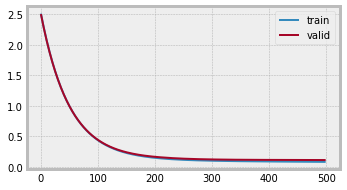

In [10]:
p = pd.DataFrame(dict([(k,evals_results[k]['l2']) for k in evals_results])).plot(figsize = (5,3))

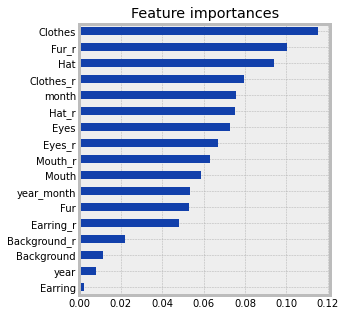

In [11]:
# feature importances
df_imp = pd.Series(model_lgb.feature_importance(), index = feats_used)
df_imp = df_imp/sum(df_imp)
df_imp = df_imp.reset_index()
df_imp.rename(columns={'index':'feat',0:'imp'}, inplace = True)
df_imp = df_imp.sort_values(by = 'imp')
p = df_imp.set_index('feat').imp.plot(kind = 'barh', figsize = (4,5), ylabel = '', color = color, title = 'Feature importances')

In [12]:
# results
pred = model_lgb.predict(xv)
# pred = pred.clip(min = y.min(), max = y.max())
pred = list(map(np.expm1, pred))

df_res = yv.reset_index()
df_res['eth_price'] = df_res['eth_price_log'].map(np.expm1)
df_res['pred'] = pred

out = list()
out2 = list()
n = df_res.shape[0]
list_t = [0,1,10,50]
for t in list_t:
    filt = df_res.eth_price > t
    out.append(ts_metrics(df_res[filt].eth_price, df_res[filt].pred))
    out2.append(df_res[filt].shape[0] / n)
    
df_out = pd.DataFrame(out)
del df_out['mse']
df_out.insert(0,'Min price in sample',list_t)
df_out.insert(1,'% of sample',out2)
df_out

,Min price in sample,% of sample,mae,mape
0,0,1.00,6.86,0.38
1,1,0.86,7.95,0.30
2,10,0.55,11.23,0.19
3,50,0.38,12.43,0.12


### Predictions

In [13]:
# predictions
feats_out1 = ['image_url','rarity','year_month','eth_price']
feats_out = feats_id + feats_out1
df_out = df[filt_null][feats_out]

df_out['pred'] = model_lgb.predict(xt)
df_out['pred_last'] = model_lgb.predict(xn)

df_out['pred'] = df_out['pred'].map(np.expm1)
df_out['pred_last'] = df_out['pred_last'].map(np.expm1)

df_out['overpriced'] = df_out.eth_price - df_out.pred

df_out['flg_last'] = df_out.groupby(feats_out[:-2]).year_month.transform(max) == df_out.year_month
df_out.sort_values('rarity',ascending = False, inplace = True)

In [14]:
print(df_out.shape)
df_out2 = df_out[df_out.flg_last]
del df_out2['flg_last']
print(df_out2.shape)
df_out2.drop_duplicates(feats_id + ['year_month'], keep = 'first', inplace = True)
df_out2.reset_index(inplace = True)
del df_out2['collection_name']
del df_out2['index']
print(df_out2.shape)

(225, 10)
(122, 9)
(107, 8)


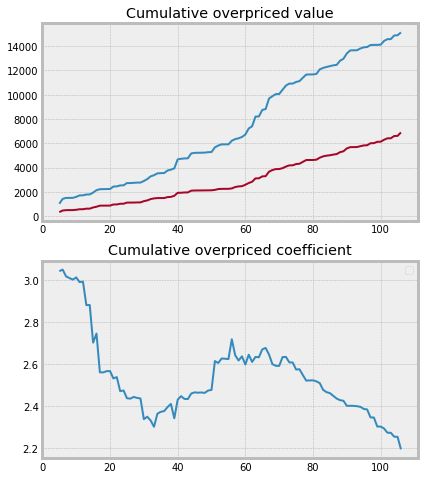

In [15]:
# Cumulative overpriced value
x1 = df_out2.eth_price.cumsum()
x2 = df_out2.pred.cumsum()

_, ax = plt.subplots(2,1, figsize = (6,8))
_ = x1.reset_index().iloc[5:,1].plot(ax = ax[0], title = 'Cumulative overpriced value')
_ = x2.reset_index().iloc[5:,1].plot(ax = ax[0])
_ = plt.legend(['Real price', 'Predicted price'])

_ = (x1/x2)[5:].plot(ax = ax[1], title = 'Cumulative overpriced coefficient')

In [16]:
display(HTML(df_out2.to_html(render_links=True, escape=False)))

,token_id,image_url,rarity,year_month,eth_price,pred,pred_last,overpriced
0,8135,,801.78,202109,550.00,72.53,100.90,477.47
1,2794,,727.28,202106,20.00,5.73,96.12,14.27
2,7658,,714.18,202108,78.00,33.74,88.67,44.26
3,8976,,707.91,202105,0.50,1.60,71.77,-1.10
4,208,,679.18,202206,178.80,101.48,73.15,77.32
5,7265,,669.74,202205,200.00,122.66,79.38,77.34
6,2980,,665.38,202204,399.00,130.03,76.74,268.97
7,4300,,664.19,202108,80.00,31.49,79.74,48.51
8,6250,,664.14,202105,1.00,1.69,82.82,-0.69
9,3609,,645.66,202105,2.20,1.95,76.22,0.25
